In [1]:
# Importing Useful Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import Counter 
import numpy as np
from sklearn.preprocessing import LabelEncoder


# Libraries for ML model

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# To Fix imbalanced data issue

!pip install imbalanced-learn
from imblearn.combine import SMOTEENN

#Evaluation metrices
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix




# To ignore/disable warnings
import warnings
warnings.filterwarnings("ignore")


### ACCESSING DATA SET

In [2]:
df_basedata = pd.read_csv("ConnectTel_customer_churn_Prediction.csv")
df_basedata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### DATA VERIFICATION

In [3]:
# Check data types

df_basedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Descriptive Statistics of Numerical Variables

In [4]:
df_basedata.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Insight
 *The average customer tenure is 32 months, however, 50% of the customers do not stay up to 32 months.
 
 *The average  monthly charge is USD 65, only 25% of the customers pay more than USD 89 per month.
 
 *No outliers
 

#### Statistical distribution of categorical data

In [5]:
df_basedata.describe(exclude=["integer", "float"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### Investigating missing values

In [6]:
null_val = df_basedata.isnull().sum()
null_val

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df_basedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the data info, it is observed there are no missing values, however, the "TotalCharges" column has an OBJECT data type, so we convert to a numeric data to acertain missing values.

In [8]:
# create a copy of the data set

df_copy = df_basedata.copy()

#then convert the "Total charges" data type from OBJECT to FLOAT

df_copy.TotalCharges = pd.to_numeric(df_copy.TotalCharges, errors = "coerce" )


# after converting, Check again for missing values 

df_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### After converting "TotalCharges" to a FLOAT data type, we observe there are 11 missing numbers.
so we can check the records to locate the missing values.

In [9]:
df_copy.loc[df_copy["TotalCharges"].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
# Percentage of missing Values

missing_percentage = (df_copy["TotalCharges"].isnull().sum()/len(df_copy["TotalCharges"]))*100
missing_percentage

0.1561834445548772

#### Since the missing record is 0.15%, it is safe to drop them

In [11]:
# Drop the missing records

df_copy.dropna(how ="any", inplace=True)

#df_copy.fillna(0)------------This replaces missing records with zero

In [12]:
df_copy

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### Create categories for Tenure, TotalCharges

In [13]:
# Tenure Category

def tenure_category(tenure):

    if tenure <=12:
        return "0-12"
    elif tenure <=24:
        return "13-24"
    elif tenure <=36:
        return "25-36"
    elif tenure <=48:
        return "37-48"
    elif tenure <=60:
        return "49-60"
    else:
        return  "61-72"
    
df_copy["tenure_category"] = df_copy["tenure"].apply(tenure_category)

df_copy

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_category
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13-24
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61-72
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12


In [14]:
# TotalCharge Category

def totalcharge_category(TotalCharges):

    if TotalCharges <=1733.2:
        return "Copper [<=1733.2]"
    elif TotalCharges <=3466.4:
        return "Bronze [<=3466.4]"
    elif TotalCharges <=5199.6:
        return "Silver [<=5199.6]"
    elif TotalCharges <=6932.8:
        return "Gold [<=6932.8]"
    else:
        return  "Platinum [>6932.8]"
    
df_copy["totalcharge_category"] = df_copy["TotalCharges"].apply(totalcharge_category)

In [15]:
df_copy

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_category,totalcharge_category
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12,Copper [<=1733.2]
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36,Bronze [<=3466.4]
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12,Copper [<=1733.2]
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48,Bronze [<=3466.4]
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12,Copper [<=1733.2]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13-24,Bronze [<=3466.4]
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61-72,Platinum [>6932.8]
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12,Copper [<=1733.2]
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12,Copper [<=1733.2]


## Exploratory Data Analysis

#### Univariate Analysis

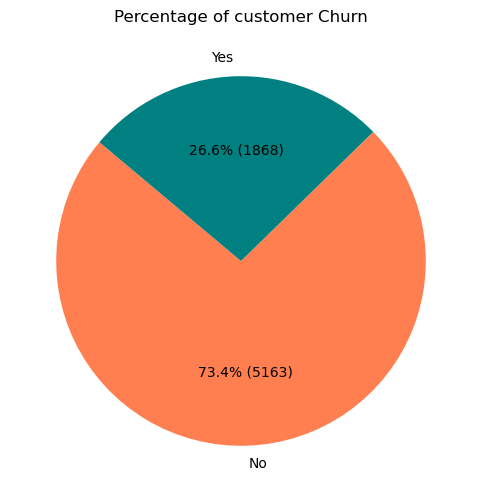

In [16]:
# Percentage of Customer Churn

fig,ax = plt.subplots(figsize=(6,6))

# Custom color for plots

custom_colors = ["coral", "Teal", "gray"]
sns.set_palette(custom_colors)

count = df_copy["Churn"].value_counts()
plt.pie(count, labels=count.index, colors=custom_colors, autopct=lambda p:f'{p:.1f}% ({int(p*sum(count)/100)})', startangle=140)
ax.set_title("Percentage of customer Churn")
plt.show();


*The ratio of Churn is 73:27, hence the data is imbalanced.

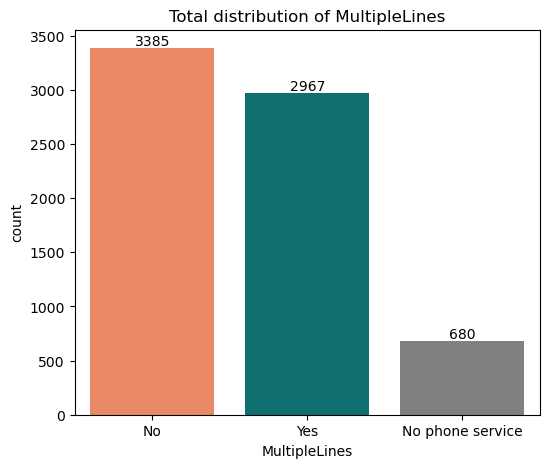

In [17]:
# Total distribution of multiple lines

plt.figure(figsize=(6,5))

ax = sns.countplot(x = df_copy["MultipleLines"], order=df_copy["MultipleLines"].value_counts(ascending=False).index)
plt.xlabel = ("MultipleLines")
plt.ylabel = ("count")
ax.bar_label(container=ax.containers[0], label="MultipleLines")
ax.set_title("Total distribution of MultipleLines");


42% of the customers have multiple lines. lack of competitive strenght in this situation may trigger churn

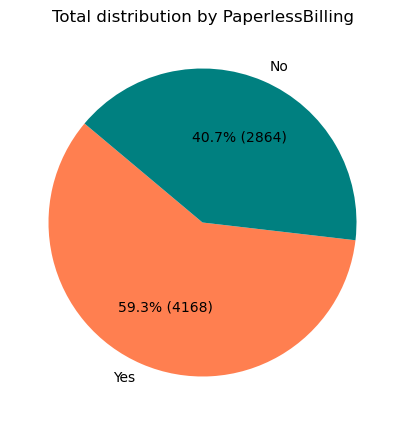

In [18]:
# Total distribution by PaperlessBilling

plt.figure(figsize=(5,5))

count = df_copy["PaperlessBilling"].value_counts()
plt.pie(count, labels=count.index,  autopct=lambda p:f'{p:.1f}% ({int(p*sum(count)/100)})', startangle=140)
#plt.axis("equal")
plt.title("Total distribution by PaperlessBilling")
plt.show()

Over 59% of the customer recieves paperless billing

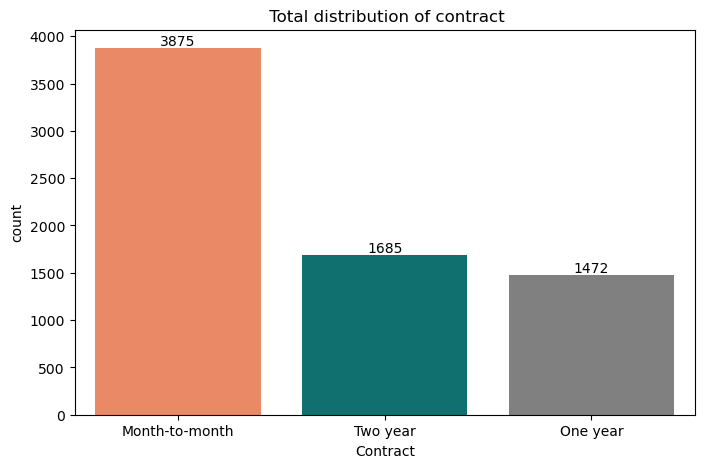

In [19]:
# Total Distribution of Contract

plt.figure(figsize=(8,5))

ax = sns.countplot(x=df_copy["Contract"], order=df_copy["Contract"].value_counts(ascending=False).index)
plt.xlabel = ("Contract")
plt.ylabel = ("Count")
ax.bar_label(container=ax.containers[0], label=count)
ax.set_title(" Total distribution of contract");

Majority of the customers (55%) are on the monthly contract

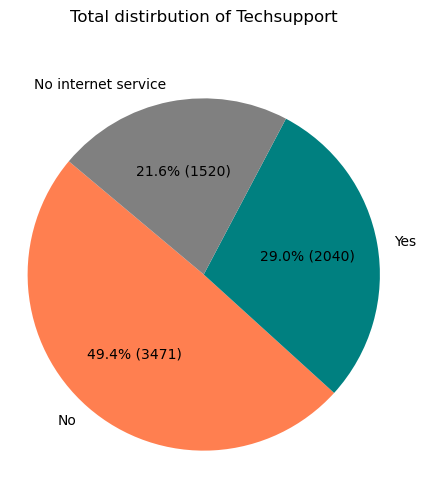

In [20]:
# Total distribution of Tech support

plt.figure(figsize=(5,5))

count = df_copy["TechSupport"].value_counts()
plt.pie(count, labels=count.index,  autopct=lambda p:f'{p:.1f}% ({int(p*sum(count)/100)})', startangle=140)
plt.axis("equal")
plt.title("Total distirbution of Techsupport\n\n\n")
plt.show()

#### Total distribution of Internet Services

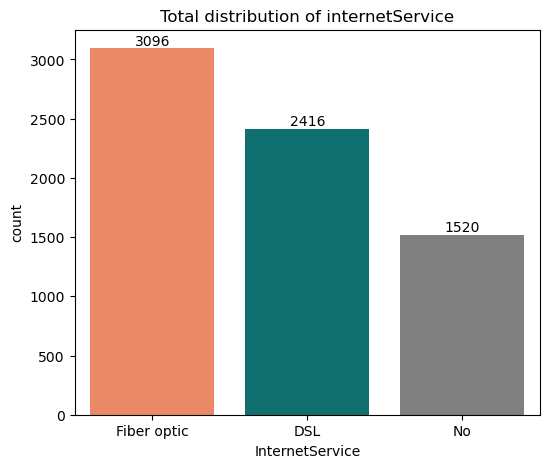

In [21]:
# Total distribution of internetService

plt.figure(figsize=(6,5))

ax = sns.countplot(x = df_copy["InternetService"],  order=df_copy["InternetService"].value_counts(ascending=False).index)
plt.xlabel =("InternetService")
plt.ylabel = ("Count")
ax.bar_label(container=ax.containers[0], label= count)
ax.set_title("Total distribution of internetService");

The fiber optic is the mostly used internet service, however, about 22% of the customers do not use internet service

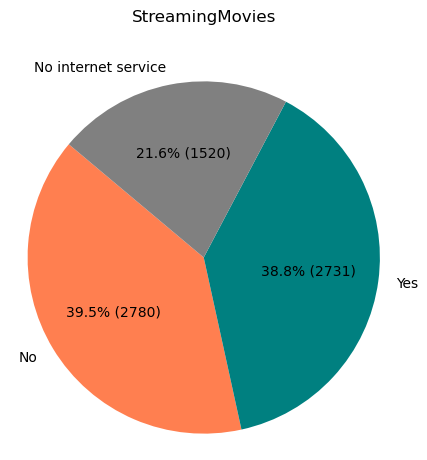

In [22]:
plt.figure(figsize=(5,5))

count = df_copy["StreamingMovies"].value_counts()
plt.pie(count, labels=count.index,  autopct=lambda p:f'{p:.1f}% ({int(p*sum(count)/100)})', startangle=140)
plt.axis("equal")
plt.title("StreamingMovies\n\n")
plt.show()

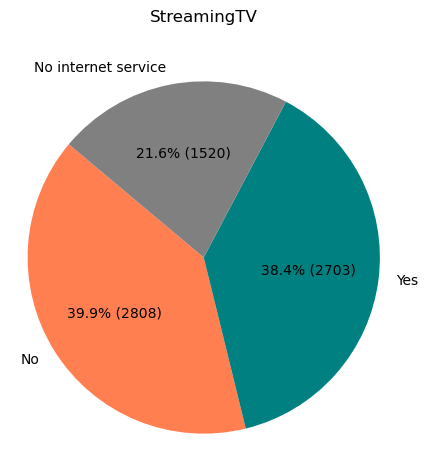

In [23]:
plt.figure(figsize=(5,5))

count = df_copy["StreamingTV"].value_counts()
plt.pie(count, labels=count.index,  autopct=lambda p:f'{p:.1f}% ({int(p*sum(count)/100)})', startangle=140)
plt.axis("equal")
plt.title("StreamingTV\n\n")
plt.show()

Customers that do not stream Tv also do not stream movies

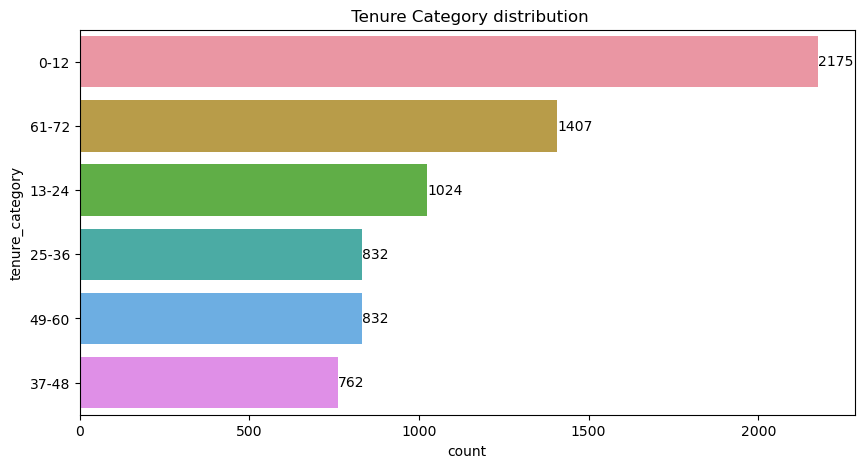

In [24]:
# Distribution of Tenure Category

plt.figure(figsize=(10,5))

ax = sns.countplot(y=df_copy["tenure_category"], order=df_copy["tenure_category"].value_counts(ascending=False).index)
plt.xlabel = ("count")
plt.ylabel = ("tenure_category")
ax.bar_label(container=ax.containers[0], label=tenure_category);
ax.set_title(" Tenure Category distribution");

*About 78% of customers that use internet, nearly 50% of them do not get tech support.

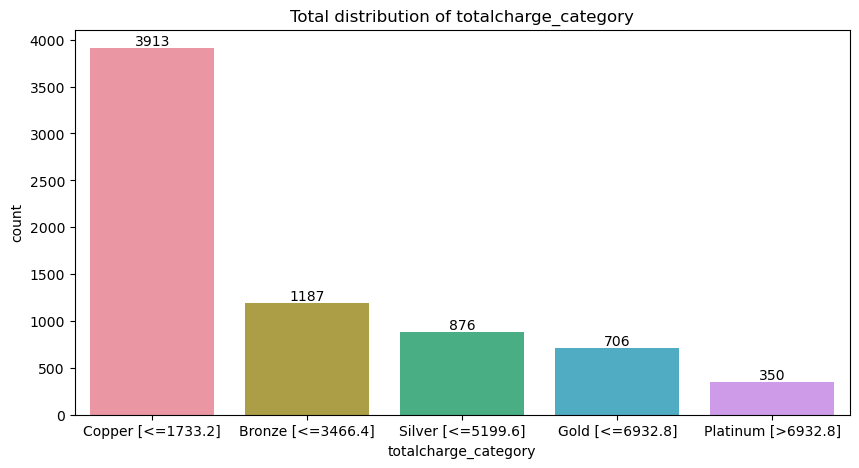

In [25]:
# Total distribution of totalCharge category

plt.figure(figsize=(10,5))

ax = sns.countplot(x = df_copy["totalcharge_category"], order=df_copy["totalcharge_category"].value_counts(ascending=False).index)
plt.xlabel = ("totalcharge_category")
plt.label = ("count")
ax.bar_label(container=ax.containers[0], label = count)
ax.set_title("Total distribution of totalcharge_category");

About 56% of the customers pay between 18-1,733.2 USD, and ony 5% pay above 6932

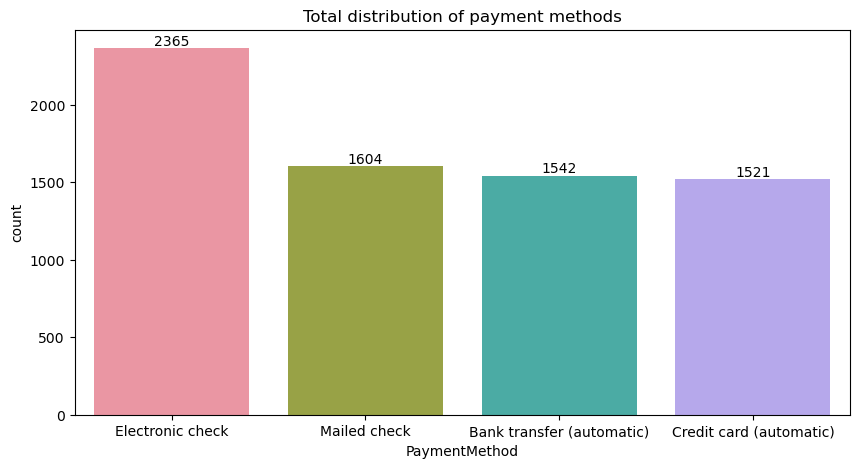

In [26]:
# Total distribution of payment method

plt.figure(figsize=(10,5))

ax = sns.countplot(x=df_copy["PaymentMethod"], order=df_copy["PaymentMethod"].value_counts(ascending=False).index)
plt.xlabel =("PaymentMethod")
plt.ylabel = ("count")
ax.bar_label(container=ax.containers[0], label=count)
ax.set_title("Total distribution of payment methods")
plt.show()

*Over 50% of customers that use the internet are unable to Stream.

*Customers that are unable to stream MOVIES are also not able to stream TV

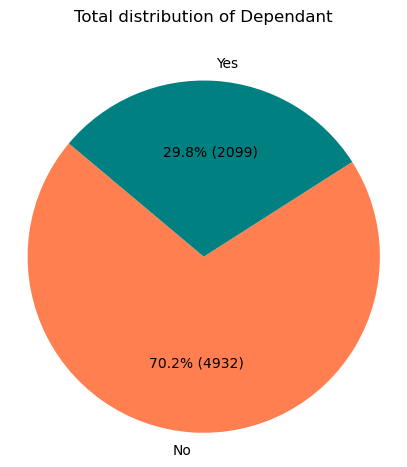

In [27]:
plt.figure(figsize=(5,5))

count = df_copy["Dependents"].value_counts()
plt.pie(count, labels=count.index,  autopct=lambda p:f'{p:.1f}% ({int(p*sum(count)/100)})', startangle=140)
plt.axis("equal")
plt.title("Total distribution of Dependant\n\n")
plt.show()

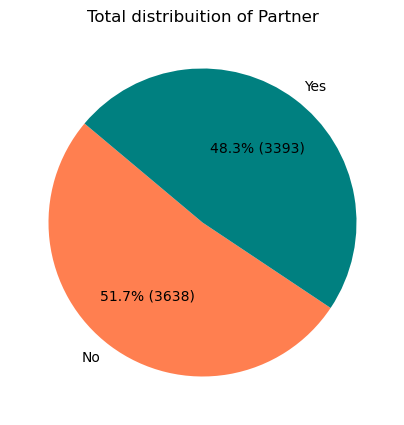

In [28]:
plt.figure(figsize=(5,5))

count = df_copy["Partner"].value_counts()
plt.pie(count, labels=count.index,  autopct=lambda p:f'{p:.1f}% ({int(p*sum(count)/100)})', startangle=140)
#plt.axis("equal")
plt.title("Total distribuition of Partner")
plt.show()

*Over 50% of the customer neither have dependant or partner

### BIVARIATE ANALYSIS

In [29]:
df_copy.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_category,totalcharge_category
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12,Copper [<=1733.2]
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36,Bronze [<=3466.4]


In [30]:
from IPython.display import display, Javascript
display(Javascript('IPython.OutputArea.prototype._should_scroll = function(lines) { return false; }'))

<IPython.core.display.Javascript object>

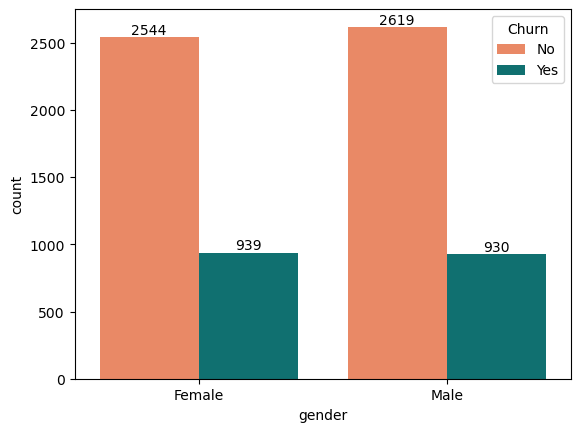

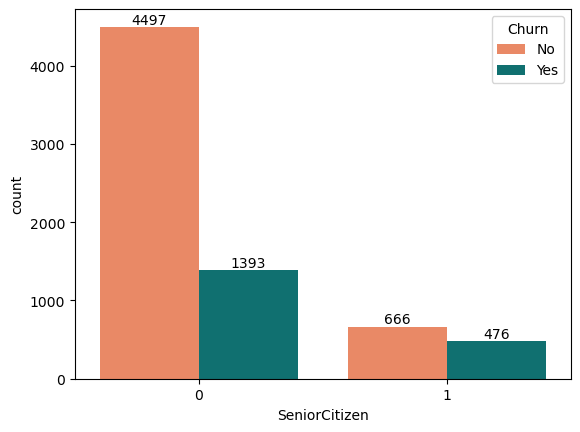

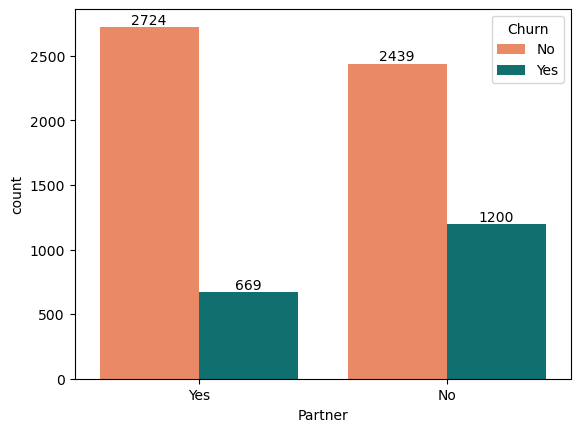

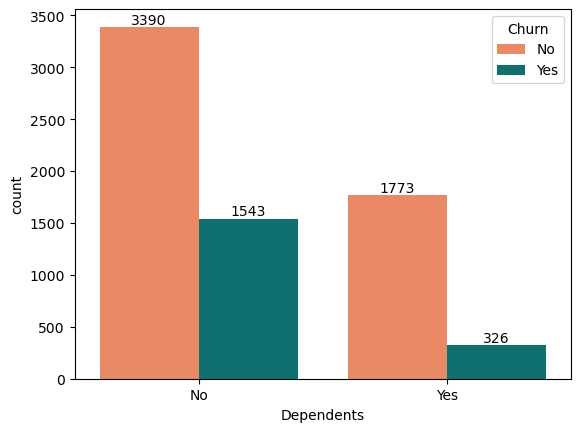

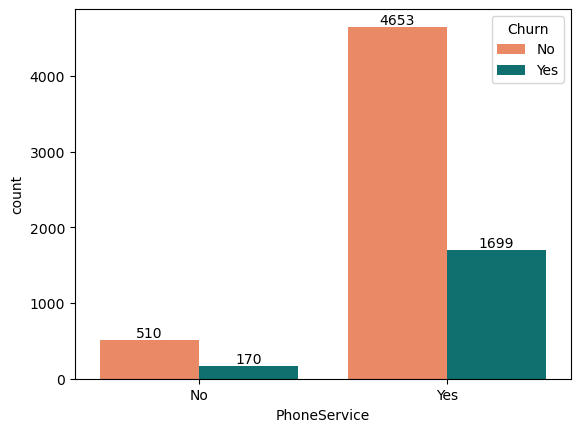

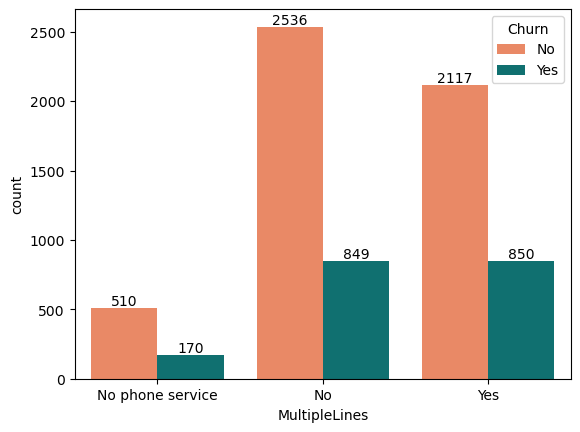

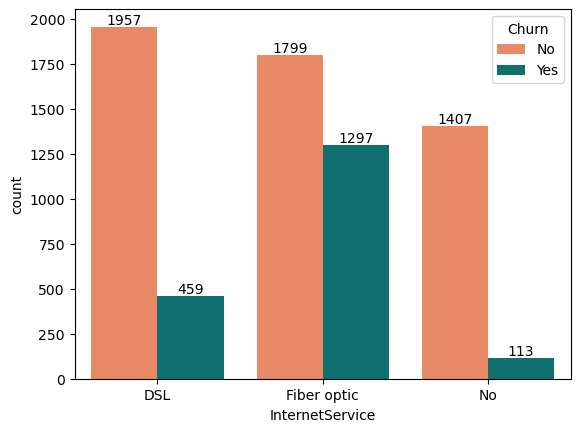

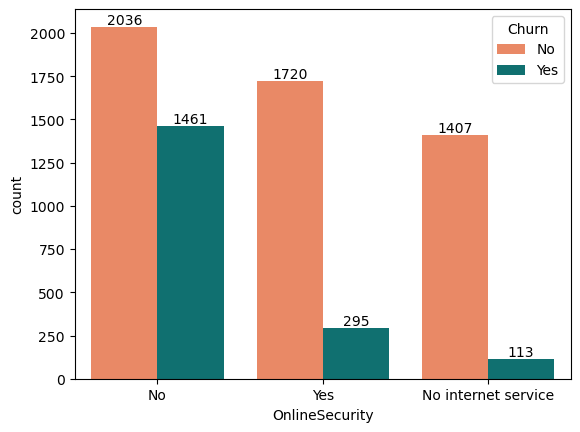

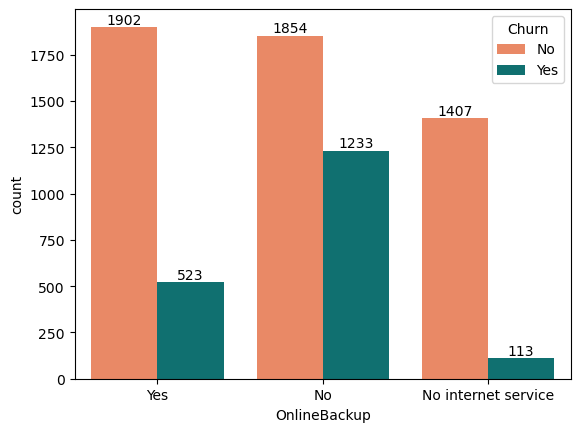

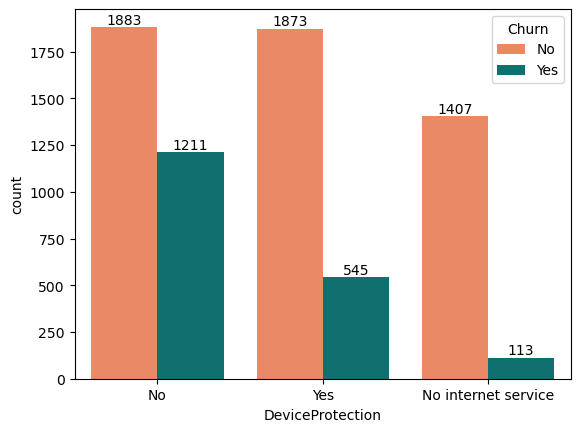

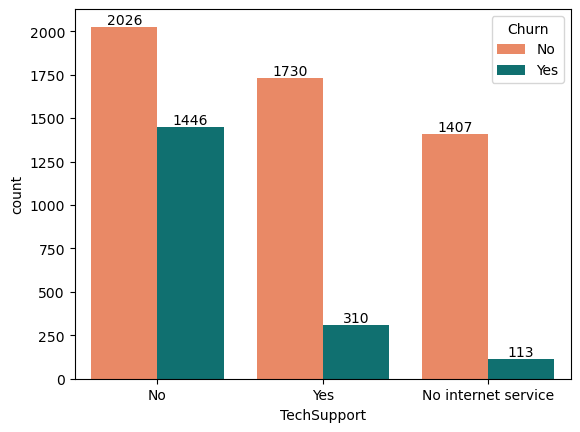

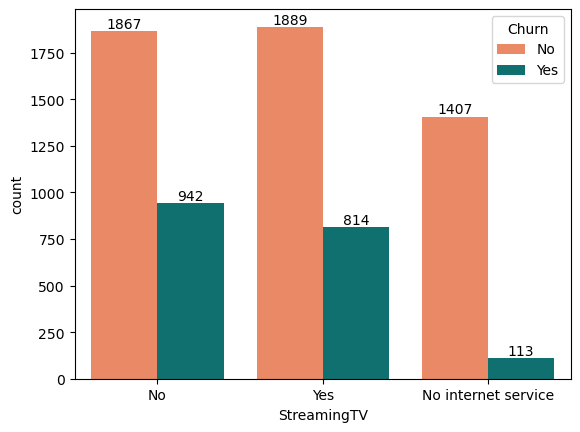

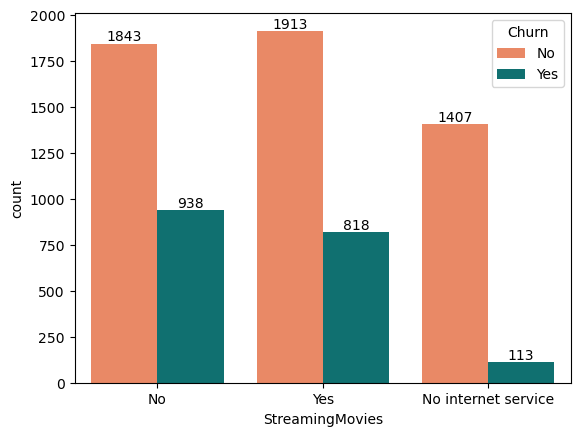

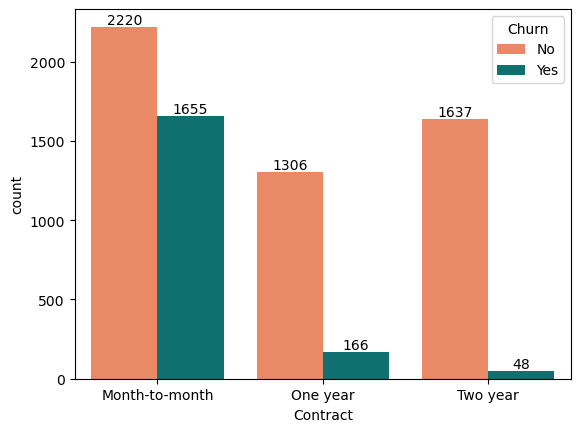

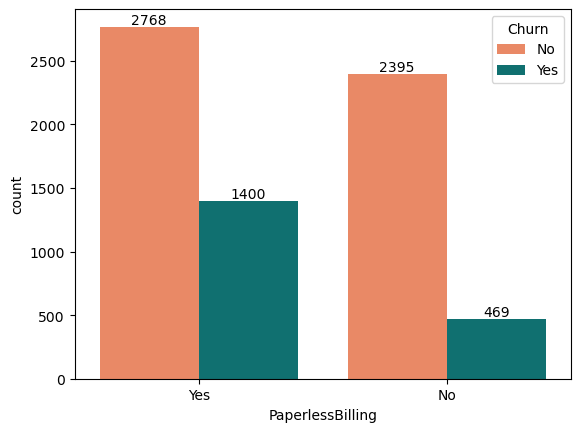

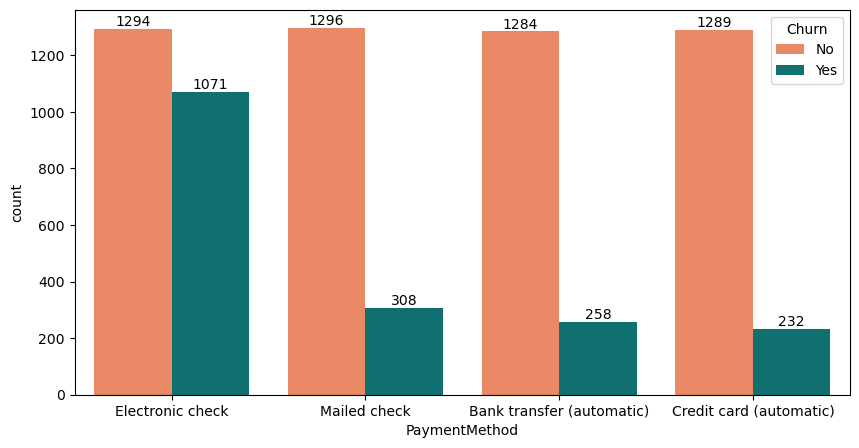

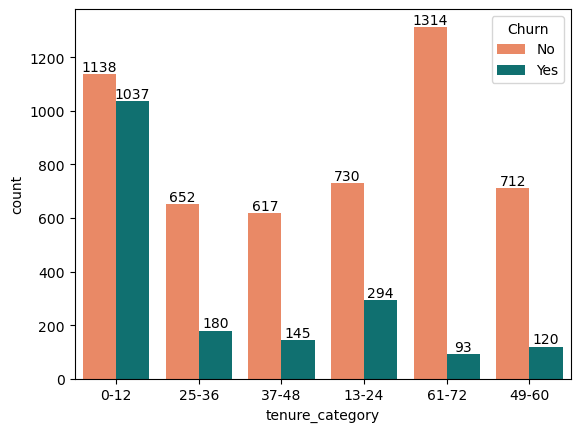

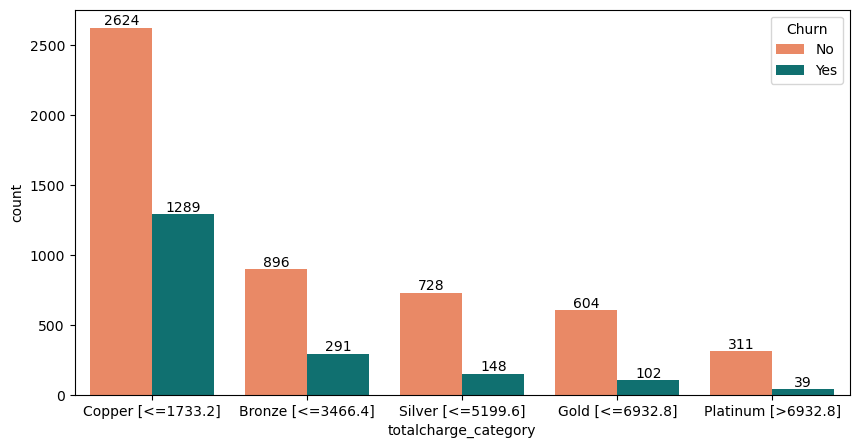

In [31]:
# Bivariate analysis of all features with CHURN except the the dropped columns
 
df_copy2 = df_copy.copy()
    
for i, predictor in enumerate(df_copy2.drop(columns=["Churn", "customerID", "tenure", "TotalCharges", "MonthlyCharges"])): 

# To adjust the display of two plot (increase the size)
    if i== 15 or i==17:
        plt.figure(figsize=(10,5))
    else:
        plt.figure(i)
    ax = sns.countplot(data=df_copy2, x=predictor, hue = "Churn")
    ax.bar_label(container=ax.containers[0], label=count)
    ax.bar_label(container=ax.containers[1], label=count)
    


### INSIGHTS FROM BIVARIATE ANALYSIS

*Mailed check, bank transfer or credit card payment method is less significant on churn, but a relationship is observed between electronic check payment method and churn, as over 45% of the customers who use electronic payment method are most likely to churn.

*Customers within 0-1year are more likely to churn. As customers are egaged from 2 to 5 years, the likelihood of churn declines. However, 93% of customers engaged for 5+ years are less likely to churn.

*Churn increases as monthly charges increases. Highest churn observed when charges is between 60 to 110 USD.

*Customers with no tech support are likely to churn.

*57% of customers on month-to-month contract are more likely to churn, while only 3% of customers on a 2 year contract are likely to churn.



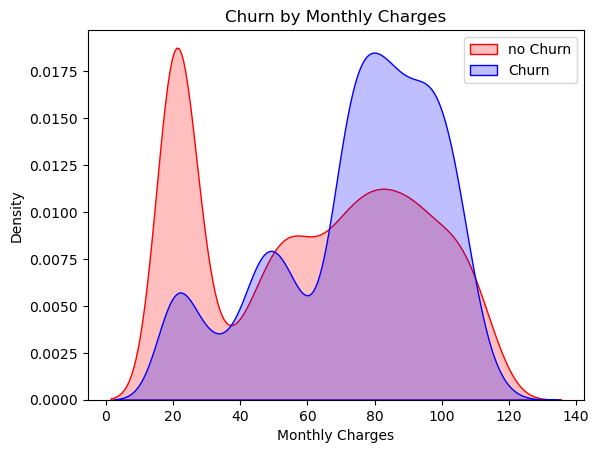

In [32]:
# Churn by monthly charges

df_copy_dummies =pd.get_dummies(df_copy)

kdp = sns.kdeplot(df_copy_dummies.MonthlyCharges[(df_copy_dummies["Churn_Yes"] == 0)],
                 color ="Red", fill =True)
kdp = sns.kdeplot(df_copy_dummies.MonthlyCharges[(df_copy_dummies["Churn_No"] ==0)],
                 ax=kdp, color ="Blue", fill =True)
kdp.legend(["no Churn", "Churn"], loc="upper right")
kdp.set_ylabel("Density")
kdp.set_xlabel("Monthly Charges")
kdp.set_title("Churn by Monthly Charges");

Churn rate increases as monthly charges increases. The highest Churn is observed when Monthly charges is between USD 60 to USD 110

## MULTIVARIATE ANALYSIS

<Axes: xlabel='SeniorCitizen', ylabel='TotalCharges'>

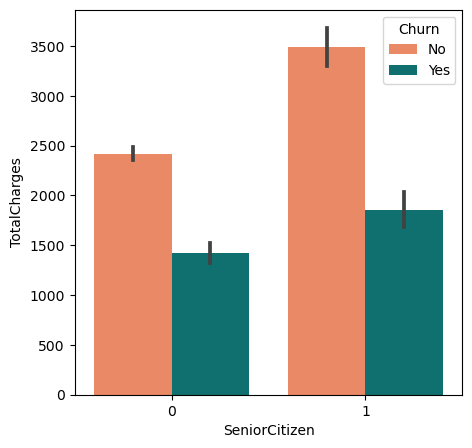

In [33]:
plt.figure(figsize=(5,5))
sns.barplot(x='SeniorCitizen', y = 'TotalCharges', data=df_copy, hue='Churn')

In [34]:
df_copy2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_category', 'totalcharge_category'],
      dtype='object')

In [35]:
# Encode the target variable (Churn) ( To prevent having a-two column dummy)

encoder = LabelEncoder()

df_copy2['Churn'] = encoder.fit_transform(df_copy2["Churn"])

In [36]:
df_copy2.drop(columns=["customerID", 'totalcharge_category', "MonthlyCharges"], inplace=True)

In [37]:
df_copy2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,tenure_category
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,0-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50,0,25-36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,1,0-12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,0,37-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,1,0-12


In [38]:
# Convert all data to numerical data


df_copy2_dummies = pd.get_dummies(df_copy2)

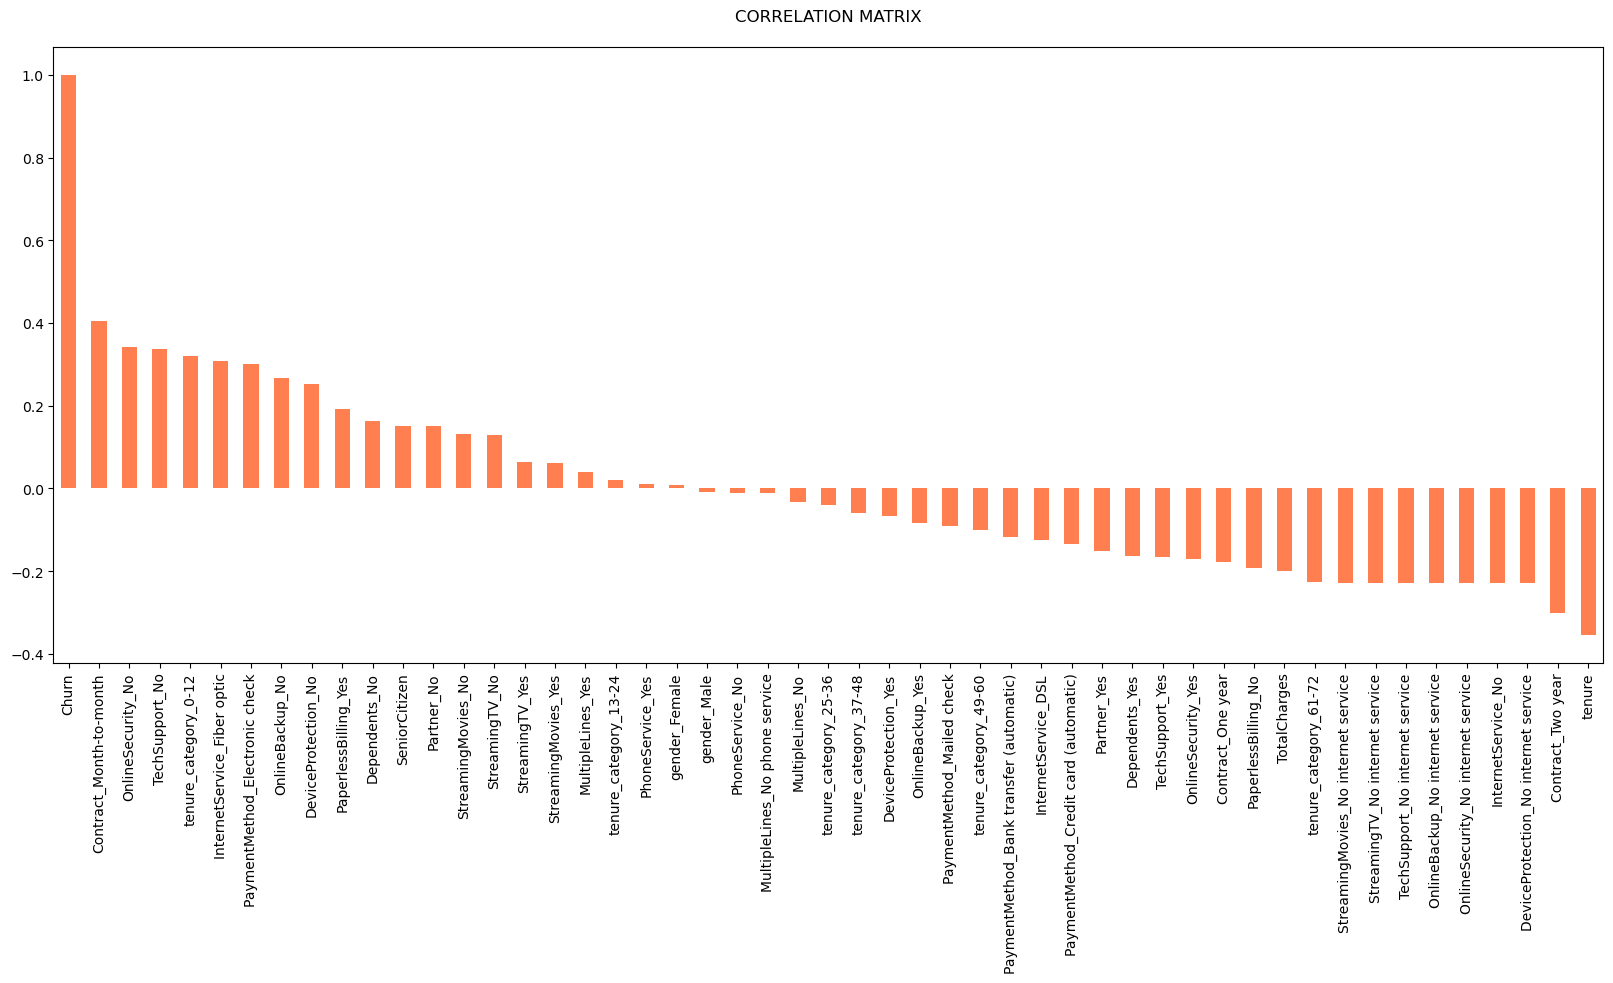

In [39]:
plt.figure(figsize=(20,8))
df_copy2_dummies.corr()["Churn"].sort_values(ascending = False).plot(kind="bar")
plt.title("CORRELATION MATRIX\n");

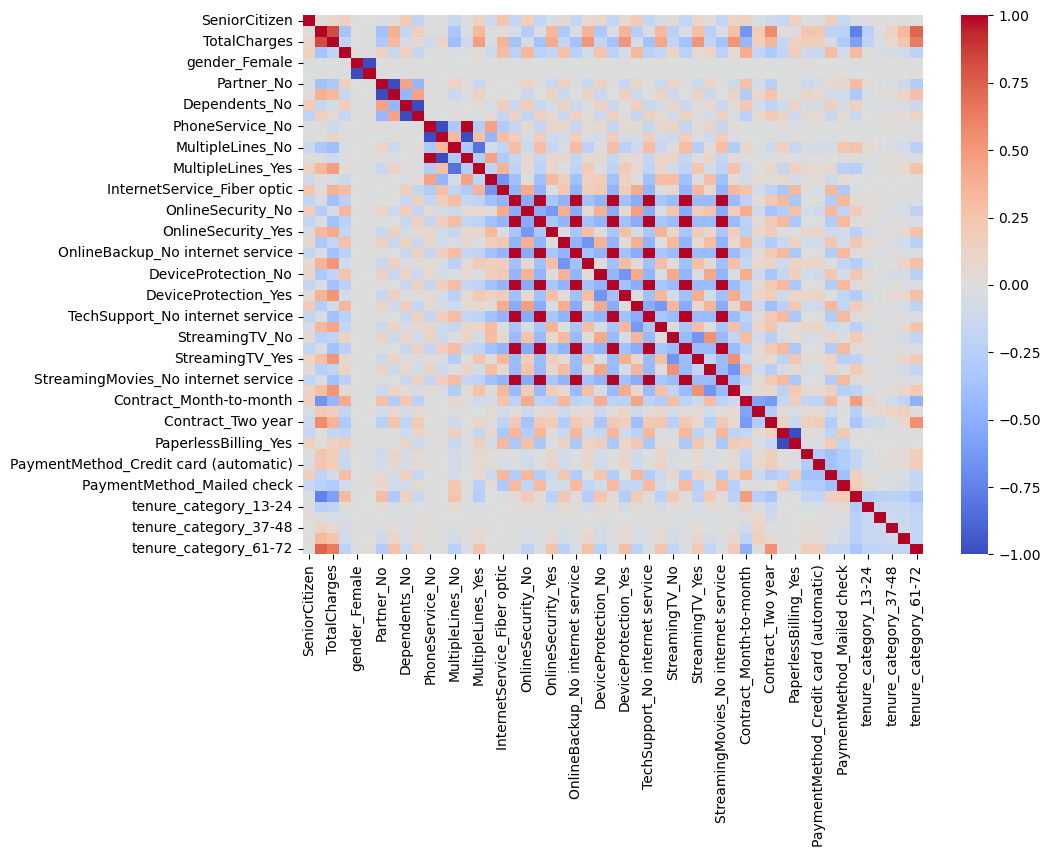

In [40]:
plt.figure(figsize=(10,7))
hm = sns.heatmap(df_copy2_dummies.corr(), cbar=True, cmap ='coolwarm',fmt='.2f')

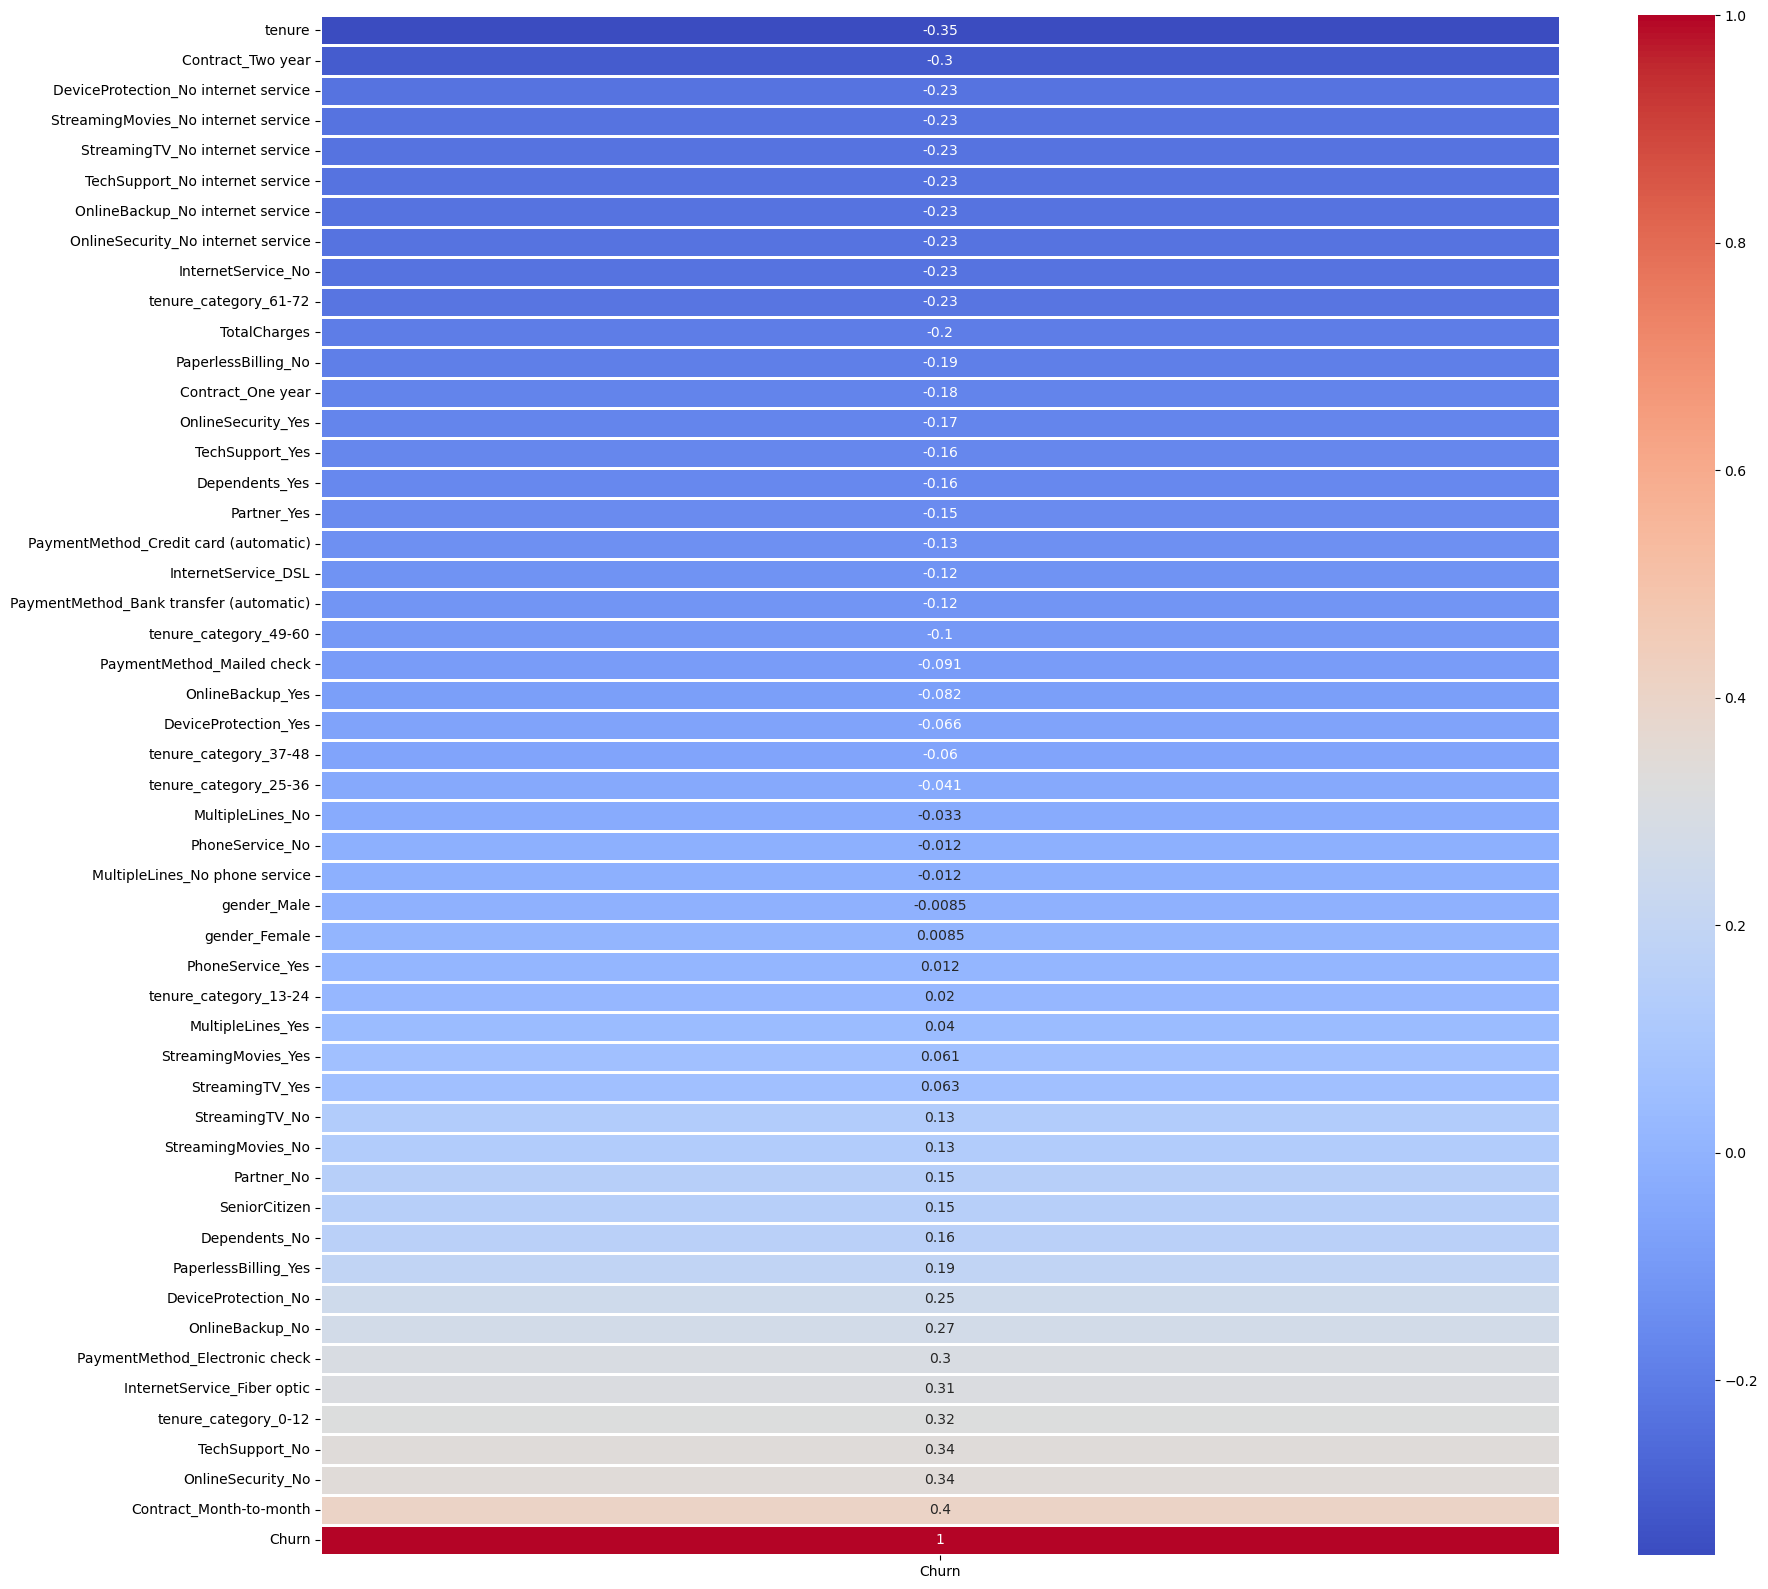

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df_copy2_dummies.corr()[['Churn']].sort_values(by='Churn'), linewidths=1, annot=True,cmap='coolwarm');

### NARRATION

*Customers on month to month contarcts, with no online security, no tech support and first year of subscription are more likely to churn.

*Customers with no internet subscription, long term contracts and tenure of 5+ years are less likely to churn.

*From the univariate analysis, the senior citizens are more likely to churn, However, from the multivariate analysis, it is observed that charges is not a signicant factor responsible for churn across in both senior and non senior citizens.

### FEATURE ENGINEERING

In [42]:
df_copy2_dummies.head()

,SeniorCitizen,tenure,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_category_0-12,tenure_category_13-24,tenure_category_25-36,tenure_category_37-48,tenure_category_49-60,tenure_category_61-72
0,0,1,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,34,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,2,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,45,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,2,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


### Segmenting the dependent and the independent variables

In [43]:
# Let the Independent variable = X, and dependent variable = Y

x = df_copy2_dummies.drop("Churn", axis =1)

y = df_copy2_dummies[["Churn"]]

In [44]:
# Spliiting data into training and validation set

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

### Model Classifiers

In [45]:
# Instantiate the model classifiers

rf_mod = RandomForestClassifier()
gb_mod = GaussianNB()
dt_mod = DecisionTreeClassifier(random_state = 42)
lr_mod = LogisticRegression()


# fitting the model

rf_mod.fit(X_train, y_train)
gb_mod.fit(X_train, y_train)
dt_mod.fit(X_train, y_train)
lr_mod.fit(X_train, y_train)




LogisticRegression()

## Prediction model


In [46]:
# Creating prediction

pred_rf = rf_mod.predict(X_test)
pred_gb = gb_mod.predict(X_test)
pred_dt = dt_mod.predict(X_test)
pred_lr = lr_mod.predict(X_test)



In [47]:
y_test.head()

,Churn
1299,1
1456,1
1606,0
925,0
1327,1


In [48]:
pred_lr

array([0, 1, 0, ..., 0, 0, 0])

### Model score

In [49]:
rf_score = rf_mod.score(X_test, y_test)
gb_score = gb_mod.score(X_test, y_test)
dt_score = dt_mod.score(X_test, y_test)
lr_score = lr_mod.score(X_test, y_test)


print(f"model Accuracy score for Logistic Regression is: {rf_score}")
print(f"model Accuracy score for Naive Bayes is: {gb_score}")
print(f"model Accuracy score for RandomForestClassifier is: {dt_score}")
print(f"model Accuracy score for DecisionTreeClassifier is: {lr_score}")

model Accuracy score for Logistic Regression is: 0.7818052594171997
model Accuracy score for Naive Bayes is: 0.7292110874200426
model Accuracy score for RandomForestClassifier is: 0.7320540156361052
model Accuracy score for DecisionTreeClassifier is: 0.8024164889836531


### Model classification Report

In [50]:
print(f"model accuracy score for Random Forest is:{rf_score}\n")
print("Random Forest Model Report: \n", classification_report(y_test,pred_rf))

model accuracy score for Random Forest is:0.7818052594171997

Random Forest Model Report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1047
           1       0.60      0.45      0.52       360

    accuracy                           0.78      1407
   macro avg       0.71      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407



In [51]:
print(f"model accuracy score for Naive Bayes is:{gb_score}\n")
print("Naive Bayes Model Report: \n", classification_report(y_test,pred_gb))

model accuracy score for Naive Bayes is:0.7292110874200426

Naive Bayes Model Report: 
               precision    recall  f1-score   support

           0       0.93      0.69      0.79      1047
           1       0.48      0.84      0.61       360

    accuracy                           0.73      1407
   macro avg       0.71      0.77      0.70      1407
weighted avg       0.81      0.73      0.75      1407



In [52]:
print(f"model accuracy score for Decision tree is:{dt_score}\n")
print("decision tree Model Report: \n", classification_report(y_test,pred_dt))

model accuracy score for Decision tree is:0.7320540156361052

decision tree Model Report: 
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1047
           1       0.48      0.50      0.49       360

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.74      0.73      0.73      1407



In [53]:
print(f"model accuracy score for Logistics Regression is:{lr_score}\n")
print("Logistic Regression Model Report: \n", classification_report(y_test,pred_lr))

model accuracy score for Logistics Regression is:0.8024164889836531

Logistic Regression Model Report: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1047
           1       0.65      0.51      0.57       360

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



### Narration.
It appears the model is biased. since it was an imbalanced data (73% of the data belonged to group 0,(Not churn)), the model tends to predict towards that direction, hence giving extremly low score to group 1 (Churn) across all model.

To handle imblanced data, we employed SMOTEENN 

### SMOTEENN

In [54]:
# fit the data on data on smoteenn to resample the data

sme = SMOTEENN(random_state=42)
X_smot, y_smot = sme.fit_resample(x, y)


In [55]:
# The somteenn train and test data

Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_smot, y_smot, test_size = 0.2)

In [56]:
# Instantiate the model classifiers

rf_mod_smote = RandomForestClassifier()
gb_mod_smote = GaussianNB()
dt_mod_smote= DecisionTreeClassifier(random_state = 42)
lr_mod_smote = LogisticRegression()


# fitting the model

rf_mod_smote.fit(Xs_train, ys_train)
gb_mod_smote.fit(Xs_train, ys_train)
dt_mod_smote.fit(Xs_train, ys_train)
lr_mod_smote.fit(Xs_train, ys_train)


LogisticRegression()

### SMOTEENN Prediction model

In [57]:
pred_rf_smote = rf_mod_smote.predict(Xs_test)
pred_gb_smote = gb_mod_smote.predict(Xs_test)
pred_dt_smote = dt_mod_smote.predict(Xs_test)
pred_lr_smote = lr_mod_smote.predict(Xs_test)


### SMOTEENN MODEL SCORE

In [58]:
rf_smote_score = rf_mod_smote.score(Xs_test, ys_test)
gb_smote_score = gb_mod_smote.score(Xs_test, ys_test)
dt_smote_score = dt_mod_smote.score(Xs_test, ys_test)
lr_smote_score = lr_mod_smote.score(Xs_test, ys_test)


print(f"model Accuracy score for Logistic Regression is: {rf_smote_score}")
print(f"model Accuracy score for Naive Bayes is: {gb_smote_score}")
print(f"model Accuracy score for RandomForestClassifier is: {dt_smote_score}")
print(f"model Accuracy score for DecisionTreeClassifier is: {lr_smote_score}")



model Accuracy score for Logistic Regression is: 0.9533721898417985
model Accuracy score for Naive Bayes is: 0.9275603663613655
model Accuracy score for RandomForestClassifier is: 0.9358867610324729
model Accuracy score for DecisionTreeClassifier is: 0.9275603663613655


### Confusion matrix for Logistic Regression

In [59]:
# Random Forest

Conf_matx = confusion_matrix(ys_test, pred_rf_smote)
Conf_matx

array([[462,  26],
       [ 30, 683]], dtype=int64)

In [60]:
# Naives Bayes

Conf_matx = confusion_matrix(ys_test, pred_gb_smote)
Conf_matx

array([[449,  39],
       [ 48, 665]], dtype=int64)

In [61]:
# Decision Tree

Conf_matx = confusion_matrix(ys_test, pred_dt_smote)
Conf_matx

array([[457,  31],
       [ 46, 667]], dtype=int64)

In [62]:
# Logistic Regression

Conf_matx = confusion_matrix(ys_test, pred_lr_smote)
Conf_matx

array([[448,  40],
       [ 47, 666]], dtype=int64)

#### NARRATION
 The logistic regression model appears to have performed well in its score (96%), however, the Random forest is observed to have performed better with less error from the confusion matrix (Minimal false negatives,- that is, predicting that a customer will not churn when in reality, they would churn) . Having a performance score of 94%, The RANDOM FOREST is the best fit.

### SUMMARY OF INSIGHTS

*Customers on month to month contarcts, with no online security, no tech support and first year of subscription are more likely to churn.

*Customers with no internet subscription, long term contracts and tenure of 5+ years are less likely to churn.

*From the univariate analysis, the senior citizens are more likely to churn, However, from the multivariate analysis, it is observed that charges is not a signicant factor responsible for churn across both senior and non senior citizens. Meaning, other factors may be responsible for the likelihood of churn by senior citizens but would likely not be charges

*Gender and availability of phone service are less significant on churn.

*Main predictors for churn
-Contract 
-Online support
-Tech support
-Tenure
-Internet service.

### Saving the model

In [63]:
import pickle

In [64]:
# name the file for the model

filename = "model_sav"

In [65]:
# Use the pickle to dump/save your model in your work file

pickle.dump(rf_mod_smote, open(filename, "wb"))

In [66]:
# To load/Read the model

model = pickle.load(open(filename, "rb"))
model


RandomForestClassifier()

In [67]:
# Test the model

model.score(Xs_test, ys_test)

0.9533721898417985